# 데이터 분석 과정
- 문제 정의
- 데이터 수집
- ☆ 데이터 전처리 (Data Preprocessing)
- ☆ 데이터 탐색 (EDA : Exploratroy Data Analysis)
- 모델링 및 분석
    - 통계적인 해석, 머신러닝
    - 알고리즘(회귀분석, 트리분석) 
- 결과 검증 및 평가
- 결과 해석 및 의사결정
<br><br>
- 강사님이 numpy, pandas에 대해 강조를 한번 더 하셨기 때문에 좀 더 잘 봐야겠다~!

---

# 데이터 전처리(Preprocessing)
- 데이터 분석 시 가장 중요한 작업
- 분석할 데이터를 클린하게 만드는 과정

## 분석 데이터의 품질
- 머신러닝 등 데이터분석 시 분석 정확도에 많은 영향을 줌

- 데이터 품질을 높이기 위해 해야 하는 작업
	- 누락 데이터 처리
	- 중복 데이터 처리
	- 분석 목적에 맞게 가공



---

## 1. 누락 데이터 처리
- 데이터프레임에는 원소 데이터 값이 종종 누락되는 경우가 있음
- 데이터를 불러올 때 누락
- 파일 형식 변환 시 소실
- 누락 데이터는 NaN(Not a Number)으로 표시


- 데이터 분석 전에 반드시 누락 데이터를 처리해야 함
	- 제거
	- 다른 값으로 대체 (평균, 중앙값, 최빈값 등..)

### 누락 데이터 확인하기

In [2]:
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### 데이터프레임의 정보 확인

In [3]:
df.info()                    # 결측치 확인 (891개 아닌 값들)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


#### 데이터프레임의 value_counts()함수로 NaN값 파악 
- nan값을 포함하여 개수 파악하기 위해 dropna=False 필수

In [4]:
# deck 열의 NaN 개수 계산하기
df['deck'].value_counts()                  # 결측치를 뺀 값을 출력

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [6]:
# NaN 값의 개수를 파악하기 
nan_deck = df['deck'].value_counts(dropna=False)   # 결측치를 포함하여 값을 출력
nan_deck

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

##### 결과 확인
- deck 열에 NaN값이 존재함
- 승객이 어떤 데크에 승선했는지 데이터가 없음

#### isnull()메서드로 파악
- isnull()
    - 누락데이터면 True, 유효한 데이터가 존재하면 False

In [7]:
# 누락 데이터 isnull()로 확인하기
df.head().isnull()                # 각 컬럼 데이터(각각의 데이터 하나하나)를 isnull로 비교. -> null값 가지고 있으면 True 출력

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


#### notnull() 메서드로 누락 데이터 찾기
- notnull()
    - 유효한 데이터가 존재하면 True, 누락데이터면 False

In [8]:
# 누락 데이터 notnull()로 확인하기
df.head().notnull()                  # 각각의 데이터 하나하나를 notnull로 비교. -> null값 가지고 있으면 False 출력 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True


#### 누락 데이터 합 파악하기

In [9]:
# 누락 데이터 개수 구하기
df.isnull().sum()                     # 전체 값에서 isnull의 총합 (null인 갯수)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
df.notnull().sum()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

### 누락 데이터 제거
- 누락 데이터 삭제 방법
    - 열 또는 행을 삭제할 수 있음
    - 열 삭제 시 분석 대상이 갖는 특성이 제거됨 (다른 유의미한 값들이 같이 삭제됨)
    - 행 삭제 시 분석 대상의 관측값(레코드)를 제거

In [11]:
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [12]:
# 데이터프레임의 데이터가 null인지 판단하는 플래그를 가진 데이터프레임 생성
missing_df = df.isnull()        # null값이 있는 값을 찾기 위해 또 하나의 데이터프레임을 생성(같은 모양). 
missing_df                      # 생성된 데이터프레임 => flag 데이터프레임

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
# for 반복문으로 각 열의 NaN 개수 계산하기
for col in missing_df.columns:                                 # 컬럼 갯수만큼 반복
    missing_count = missing_df[col].value_counts()             # 각 열에서 NaN 개수를 파악
    try:                                                       # missing_count[True] 값이 안맞을 상황 대비하여 예외처리
        print(col, ':', missing_count[True])                   # NaN이 있으면 개수 출력
    except:
        print(col,':', 0)                                      # NaN 없으면 0 출력

survived : 0
pclass : 0
sex : 0
age : 177
sibsp : 0
parch : 0
fare : 0
embarked : 2
class : 0
who : 0
adult_male : 0
deck : 688
embark_town : 2
alive : 0
alone : 0


In [14]:
# NaN 값이 500개 이상인 열을 모두 삭제 - deck 열(891개 중 688개의 NaN 값) 
df_thresh = df.dropna(axis=1, thresh=500)                  # axis=1 : 열 방향 설정 / thresh=500 : NaN 값이 500개 이상인 값을 삭제

In [15]:
# df_thresh 확인
df_thresh                         # deck 열 삭제 확인

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [18]:
# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
df_age = df.dropna(subset=['age'])       # subset=['age'] : age컬럼을 선택  /  axis=0 (default, 안써도 됨)


# dropna 
# - DataFrame에서 NaN value가 존재하는 행(row) 또는 열(column)을 제거해줍니다.

# subset = [col1, col2, ...]
# subset을 명시하지 않으면 DataFrame 전체(모든 column & 모든 row)에 대해 dropna를 진행
# subset을 명시하면 subset에 적힌 column값에 대해서만 dropna를 진행

# how = 'any'/'all'
# any -> row 또는 column에 NaN값이 1개만 있어도 drop (default 값입니다.)
# all -> row 또는 column에 있는 모든 값이 NaN이어야 drop

In [19]:
# 확인
df_age

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### 누락 데이터 치환
- 누락 데이터를 무작정 삭제하는 것이 좋지 못한 방법일 수도 있음
- 데이터 수집 자체도 어려운데 데이터 하나 하나가 중요할 수 있음
- 데이터 분석의 정확도나 신뢰도는 데이터 품질 뿐 아니라 양에도 영향을 받음
- 따라서 데이터 중 일부의 누락 값을 다른 값으로 대체하여 나머지 데이터를 활용하는 것도 방법이 될 수 있음


- 누락 데이터를 치환하기 좋은 데이터는 데이터 분포의 특성을 잘 나타낼 수 있는 값으로 함
    - 평균값, 최빈값 등을 활용
- 판다스의 fillna()함수로 처리(원본에 적용 시 inplace=True 필요)

In [95]:
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [21]:
# 기술통계 값 확인
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
# age 열의 첫 10개 데이터 출력 (5 행에 NaN 값)
df['age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [23]:
# age 열의 평균 계산 (NaN 값 제외)
mean_age = df['age'].mean()                    # mean : 평균 (NaN 값을 제외하고 평균)
mean_age

29.69911764705882

In [24]:
# 평균 대신 중간값을 사용하고 싶은 경우 median()메서드 사용
median_age = df['age'].median()                # median : 중앙값
median_age                                     # 데이터 분포를 확인하고 평균 또는 중앙값 등.. 사용할지를 결정!

28.0

In [25]:
# age 열의 NaN값을 다른 나이 데이터의 평균으로 변경하기
df['age'].fillna(mean_age).head(10)            # NaN 값을 평균값으로 채운다. (원본에 적용 X)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64

In [26]:
# 변경된 자료 원본에 적용하기

# df['age'] = df['age'].fillna(mean_age)
df['age'].fillna(mean_age, inplace=True)
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.000000,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.000000,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.000000,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.000000,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [27]:
# age 열의 첫 10개 데이터 출력 (5 행에 NaN 값이 평균으로 대체)
df['age'].head(10)                             # 5행 값 변경된 결과를 확인

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64

#### embark_town열의 NaN값을 다른 값으로 치환
- 이번엔 승객들이 가장 많이 승선한 도시의 이름을 찾아 NaN값을 치환

In [96]:
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [30]:
# embark_town 열의 61행의 NaN 데이터 출력
df['embark_town'][60:65]

60      Cherbourg
61            NaN
62    Southampton
63    Southampton
64      Cherbourg
Name: embark_town, dtype: object

In [29]:
# embark_town 열의 829행의 NaN 데이터 출력
df['embark_town'][825:835]

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
830      Cherbourg
831    Southampton
832      Cherbourg
833    Southampton
834    Southampton
Name: embark_town, dtype: object

In [31]:
# 승선도시 값의 각 개수 파악                       # 정수값 하나하나 Series로 확인
df['embark_town'].value_counts(dropna=False)       # NaN 값 2개 확인

Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: embark_town, dtype: int64

In [33]:
# embark_town 열의 승선도시 중에서 가장 많이 출현한 값 확인
most_freq = df['embark_town'].value_counts(dropna=True).idxmax()         # 최빈값의 index를 확인
most_freq

'Southampton'

In [34]:
# 가장 많이 출현한 값으로 embark_town 열의 NaN값을 치환
df['embark_town'].fillna(most_freq, inplace=True)                         # NaN 값을 최대값인 도시로 채워넣는다.

In [35]:
# embark_town 열의 61행의 NaN 데이터 출력
df['embark_town'][60:65]                           # 61행 결과 바뀐거 확인 (NaN -> Southampton)

60      Cherbourg
61    Southampton
62    Southampton
63    Southampton
64      Cherbourg
Name: embark_town, dtype: object

In [36]:
# embark_town 열의 829행의 NaN 데이터 출력
df['embark_town'][825:835]                         # 829행 결과 바뀐거 확인 (NaN -> Southampton)

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
830      Cherbourg
831    Southampton
832      Cherbourg
833    Southampton
834    Southampton
Name: embark_town, dtype: object

### 이웃한 값으로 누락 데이터 치환하기
- 이웃 데이터간 유사하다고 판단되는 경우 사용
- method=옵션  
    'ffill' 바로 앞 행의 값으로  
    'bfill' 바로 다음 행의 값으로
- 평균, 중앙값이 아닌 근접한 값으로 NaN 채우기
---
- .fillna(method='ffill') : 바로 앞 행의 값으로 NaN 을 채움

In [37]:
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [38]:
# embark_town 열의 61행의 NaN 데이터 출력
df['embark_town'][60:65]

60      Cherbourg
61            NaN
62    Southampton
63    Southampton
64      Cherbourg
Name: embark_town, dtype: object

In [39]:
# embark_town 열의 829행의 NaN 데이터 출력
df['embark_town'][825:835]

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
830      Cherbourg
831    Southampton
832      Cherbourg
833    Southampton
834    Southampton
Name: embark_town, dtype: object

In [40]:
# embark_town 열의 NaN값을 바로 앞에 있는 값으로 61행의 값 변경하기
df['embark_town'].fillna(method='ffill')[60:70]                 # 앞의 값으로 NaN 변경 (원본 변경 X)

60      Cherbourg
61      Cherbourg
62    Southampton
63    Southampton
64      Cherbourg
65      Cherbourg
66    Southampton
67    Southampton
68    Southampton
69    Southampton
Name: embark_town, dtype: object

In [41]:
# embark_town 열의 NaN값을 바로 뒤에 있는 값으로 61행의 값 변경하기
df['embark_town'].fillna(method='bfill')[60:70]                 # 앞의 값으로 NaN 변경 (원본 변경 X)

60      Cherbourg
61    Southampton
62    Southampton
63    Southampton
64      Cherbourg
65      Cherbourg
66    Southampton
67    Southampton
68    Southampton
69    Southampton
Name: embark_town, dtype: object

In [33]:
# embark_town 열의 NaN값을 바로 앞에 있는 값으로 829행의 값 변경하기
df['embark_town'].fillna(method='ffill')[825:830]

In [34]:
# embark_town 열의 NaN값을 바로 뒤에 있는 값으로 829행의 값 변경하기
df['embark_town'].fillna(method='bfill')[825:830]

### 추가내용
- 누락 데이터는 반드시 NaN이라는 보장은 없음
- 숫자 0이거나 특수문자('-', '?' 등)같은 값으로 존재할 수도 있음     
    - ex) age에서 숫자 대신 이상한 값이 들어간 경우
- replace()메서드를 사용하여 np.nan으로 변경할 필요가 있을 수 있음
- import numpy as np 필요

    '?'값을 np.nan으로 치환 예시  
    df.replace('?', np.nan, inplace=True)  >>>> NaN으로 치환

# 2. 중복 데이터 처리
- 데이터 셋에서 동일한 관측값이 2개 이상 중복되는 경우 처리가 필요
- 동일한 대상이 중복으로 존재하면 분석결과를 왜곡하기 때문

## 중복데이터 확인
- duplicated()함수
    - 행의 데이터를 하나씩 확인해서 이전에 나온 값이면 True를 아니면 False를 반환함

In [42]:
# 라이브러리 불러오기
import pandas as pd

# 중복 데이터를 갖는 데이터프레임 만들기
df = pd.DataFrame(
    {
        'c1':['a', 'a', 'b', 'a', 'b','c'],
        'c2':[1, 1, 1, 2, 2, 1],
        'c3':[1, 1, 2, 2, 2, 1]
    })                             # 중복 데이터 - 기준마다 다름.
df                                 # 1) 한 행이 들어가고 그 다음 행이 들어갔을 때 중복일 경우 중복데이터로 판단. (ex) 0, 1행
                                   # 2) 열의 값으로 중복데이터를 구분할 수 도 있음.

,c1,c2,c3
0,a,1,1
1,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2
5,c,1,1


In [43]:
# 데이터프레임 전체 행 데이터 중에서 중복값 찾기
df_dup = df.duplicated()
df_dup                                          # 1) 전체 행을 기준으로 중복값을 찾음.

0    False
1     True
2    False
3    False
4    False
5    False
dtype: bool

In [44]:
# 데이터프레임의 특정 열 데이터에서 중복값 찾기
col_dup = df['c2'].duplicated()                # 2) 특정 열을 기준으로 중복값을 찾음.
col_dup

0    False
1     True
2     True
3    False
4     True
5     True
Name: c2, dtype: bool

### 중복데이터 제거
- drop_duplicates()
    - 중복되는 행을 제거하고 고유한 값을 가지는 행만 남김
    - 원본에 바로 적용하려는 경우 inplace=True 옵션 추가

In [53]:
# 라이브러리 불러오기
import pandas as pd

# 중복 데이터를 갖는 데이터프레임 만들기
df = pd.DataFrame(
    {
        'c1':['a', 'a', 'b', 'a', 'b','c'],
        'c2':[1, 1, 1, 2, 2, 1],
        'c3':[1, 1, 2, 2, 2, 1]
    })
df

,c1,c2,c3
0,a,1,1
1,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2
5,c,1,1


In [49]:
# 중복 데이터 제거하기

# df2 = df.drop_duplicates() 
# df2                                                      # 원본 미적용

df.drop_duplicates(inplace=True)                           # 원본적용
df

,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2
5,c,1,1


In [51]:
# 중복 데이터를 확인할 열을 지정하여 제거
df3 = df.drop_duplicates(subset=['c1'])                    # subset으로 c1의 열을 지정하여 중복 데이터 제거
df3

,c1,c2,c3
0,a,1,1
2,b,1,2
5,c,1,1


In [54]:
# 중복 데이터를 확인할 열을 지정(지정된 열의 중복을 판단)
df4 = df.drop_duplicates(subset=['c1', 'c3'])              # c1과 c3 두 열의 값을 묶어서 중복을 확인 
df4                                                        # ex) a-1,  b-2,  c-1

,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2
5,c,1,1


# 데이터 표준화
- 분석할 데이터셋은 다양한 사람들을 통해 만들어짐
- 여러 소스에서 수집한 자료들은 다양한 형태로 표현됨
    - 단위, 대소문자, 약칭 등이 일관되지 않을 수 있음
- 동일한 대상을 표현하는 방법은 차이가 있을 수 있음
- 분석의 정확도를 위해서 일관성 있게 표준화 하는 작업이 필요

---
- 범위가 너무 클 때 일관되게 만드는 방법

### 단위 환산하기
- UCI자동차 연비 데이터셋 사용


- 'mpg'열의 단위는 영미권에서 사용되는 갤런 당 마일(mile per gallon)이다.
- 한국식 단위로 리터 당 킬로미터(km/L)로 변환해본다.  
    1 mile = 1.60934 km  
    1 gallon = 3.78541 L  
    1 mpg = 0.425 km/L  


In [55]:
# 라이브러리 불러오기
import pandas as pd

# read_csv() 함수로 df 생성
df = pd.read_csv('./08auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


In [56]:
# mpg(mile per gallon)를 kpl(kilometer per liter)로 변환
# 1 mile -> 1.609344 Kilometers
# 1 gallon -> 3.78541 Liters

mpg_to_kpl = 1.60934/3.78541
mpg_to_kpl                           # 사용할 단위 설정

0.42514285110463595

In [58]:
# mpg 열에 앞에서 변환에 사용할 단위를 곱한 결과를 새로운 열(kpl)에 추가
df['kpl'] = df['mpg'] * mpg_to_kpl
df.head(3)                          # 위의 새로운 단위를 사용하여 기존의 값에 곱 --> 새로운 열로 데이터 저장 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.652571
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.377143
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.652571


In [59]:
# kpl 열을 소수점 아래 둘째 자리에서 반올림 
df['kpl'] = df['kpl'].round(2)
df.head(3)                          # round() 활용하여 반올림

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.65
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.38
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.65


### 자료형 변환(Data Type Conversion)
- 데이터들의 자료형을 일관되게 만들어야 함
- 분석에 어려운 형태의 자료는 분석이 쉽고 직관적인 형태로 가공
---
- 어지간하면 숫자로 변경하여 진행하면 된다.

In [61]:
# 라이브러리 불러오기
import pandas as pd

# read_csv() 함수로 df 생성
df = pd.read_csv('./08auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# 각 열의 자료형 확인
df.dtypes                                 # object 는 문자열

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
name             object
dtype: object

In [62]:
# horsepower 열의 고유값 확인
df['horsepower'].unique()                 # unique() : 고유값을 확인. / ''(홀따옴표)로 묶여있음 -> 문자열

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

##### 확인하기
- 고유값을 확인해 보면 숫자로 이루어진 문자열 자료형인데 중간에 '?'문자도 들어있다.
- csv파일을 데이터프레임으로 전달 시 '?'문자 때문에 object형으로 들어온 것으로 보임
---
- 수치로 치환 안되는 자료일 경우 ?와 같이 문자열로 들어올 수 있다

In [63]:
# 누락 데이터('?') 삭제 
import numpy as np

df['horsepower'].replace('?', np.nan, inplace=True)         # ? 을 np.nan (NaN)으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)      # 누락 데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')         # 문자열을 실수형으로 변환
df['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [64]:
# horsepower 열의 자료형 확인
df['horsepower'].dtype

dtype('float64')

In [65]:
# origin 열의 고유값 확인
df['origin'].unique()

array([1, 3, 2], dtype=int64)

##### 'origin'열을 보면 정수형 데이터로 1, 2, 3이 들어 있는데 실제로 이 값은 국가이름을 의미
    - 1 = 'USA'
    - 2 = 'EU'
    - 3 = 'JPN'

In [66]:
# 정수형 데이터를 문자형 데이터로 변환 
df['origin'].replace({1:'USA', 2:'EU', 3:'JAPAN'}, inplace=True)

In [67]:
# origin 열의 고유값 확인
df['origin'].unique()                       # 1,3,2 정수형 데이터가 object로 변환됨

array(['USA', 'JAPAN', 'EU'], dtype=object)

In [68]:
# origin 열의 자료형 확인
df['origin'].dtype

dtype('O')

In [69]:
# 데이터프레임 df 확인
df                                          # 변경된 origin 값 확인.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,EU,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA,ford ranger


##### 생각하기
- 이렇게 만든 'origin'열의 자료형은 object가 되는데 여기 값들은 국가이름으로 3종류의 문자열이 반복적으로 나타남
- 고유한 값이 반복적으로 나타나는 경우는 범주형으로 표현하는 것이 효율적일 수 있다.
- astype('category') 메서드를 이용하여 범주형 데이터타입으로 변환한다.

In [70]:
# origin 열의 문자열 자료형을 범주형으로 변환
df['origin'] = df['origin'].astype('category')           # 고유한 값 반복이기 때문에 category로 자료 변환
df['origin'].dtypes

CategoricalDtype(categories=['EU', 'JAPAN', 'USA'], ordered=False)

In [71]:
# 데이터프레임 df 확인
df                                                      # 달라진건 없다 ~

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,EU,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA,ford ranger


In [72]:
# 범주형을 문자열로 다시 변환
df['origin'] = df['origin'].astype('str')            # str 형으로 자료 변환
df['origin'].dtypes

dtype('O')

In [75]:
# 'model year'열의 자료형을 확인(무작위로 3개의 행을 선택)
df['model year'].sample(3)                           # sample(개수) : 실행할 때마다 무작위로 개수만큼 행을 선택.

54     71
384    82
0      70
Name: model year, dtype: int64

##### 생각하기
- 연식에 해당하는 연도가 두 자리 숫자로 나타난다.
- 시간의 순서는 의미 있지만 숫자 자체의 크기는 별 의미가 없다.
- 이러한 데이터는 숫자로 이루어져 있지만 범주형으로 표현하는 것이 적절
---
숫자 간에 비교가 의미 없을 때는 범주형으로 표현이 적절

In [76]:
# model year 열의 정수형을 범주형으로 변환
df['model year'] = df['model year'].astype('category')
print(df['model year'].sample(3))                           # category로(범주형) 자료 변환

299    79
40     71
214    76
Name: model year, dtype: category
Categories (13, int64): [70, 71, 72, 73, ..., 79, 80, 81, 82]


# 범주형(카테고리) 데이터 처리

## 구간분할
- 데이터분석 알고리즘에 따라 연속 데이터를 일정 구간으로 나눠서 분석하는 것이 효율적인 경우가 있음
- 가격, 비용, 효율 등 연속적인 값을 일정한 수준이나 정도를 나타내는 이산적인 값으로 나타내어 구간별 차이를 만드는 것
	- 연속변수를 일정한 구간으로 나눔
	- 각 구간을 범주형 이산 변수로 변환하는 것

- cut()으로 연속 데이터를 여러 구간으로 분할
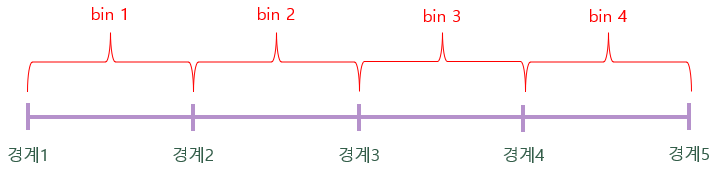

In [98]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

# read_csv() 함수로 df 생성
df = pd.read_csv('./08auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'].replace('?', np.nan, inplace=True)         # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)      # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')         # 문자열을 실수형으로 변환
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


### 마력을 구간분할 하기
- 'horsepower'열은 엔진 출력을 나타냄
- 경우에 따라서 '저출력', '보통출력', '고출력' 등과 같은 구간으로 나눠야 될 상황도 있음
- 경계값을 지정하여 구간을 구분


- numpy의 histogram()함수 활용
    - 나누고자하는 구간(bin)개수를 bins= 옵션에 지정
    - count,와 bin_dividers를 반환함

In [99]:
# np.histogram 함수로 3개의 bin으로 나누는 경계 값의 리스트 구하기
count, bin_dividers = np.histogram(df['horsepower'], bins=3)            # bins=3 : 구간으로 나누는 기준을 정함 (3으로 나눔)
print(count, bin_dividers)                                              # 구간을 나누어서   46 (257개) 107 (103개) 168  (32개) 230
                                                                        #  코드 결과:  구간 |-----------|----------|-----------|               

[257 103  32] [ 46.         107.33333333 168.66666667 230.        ]


In [100]:
df['horsepower'].max()

230.0

In [101]:
df['horsepower'].min()

46.0

In [102]:
# cut()메서드로 경계를 이용하여 범주형 데이터를 추가
# 3개의 bin에 이름 지정( ['저출력', '보통출력', '고출력'] )
bin_names = ['저출력', '보통출력', '고출력']

# pd.cut 함수로 각 데이터를 3개의 bin에 할당
df['hp_bin'] = pd.cut(x=df['horsepower'],      # 데이터 배열
                     bins=bin_dividers,        # 경계 값 리스트
                     labels=bin_names,         # bin 이름
                     include_lowest=True)      # 첫 경계값 포함

# horsepower 열, hp_bin 열의 첫 15행을 출력
df[['horsepower','hp_bin']].head(15)

,horsepower,hp_bin
0,130.0,보통출력
1,165.0,보통출력
2,150.0,보통출력
3,150.0,보통출력
4,140.0,보통출력
5,198.0,고출력
6,220.0,고출력
7,215.0,고출력
8,225.0,고출력
9,190.0,고출력


In [83]:
# 데이터프레임 정보 확인
df.info()                                        # 추가한 자료형 : category

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    int64   
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        392 non-null    float64 
 5   acceleration  392 non-null    float64 
 6   model year    392 non-null    int64   
 7   origin        392 non-null    int64   
 8   name          392 non-null    object  
 9   hp_bin        392 non-null    category
dtypes: category(1), float64(5), int64(3), object(1)
memory usage: 31.1+ KB


### 더미변수
- 구간분할에 이어서 진행

In [103]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

# read_csv() 함수로 df 생성
df = pd.read_csv('./08auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# np.histogram 으로 3개의 bin으로 나누는 경계 값의 리스트 구하기
count, bin_dividers = np.histogram(df['horsepower'], bins=3)

# 3개의 bin에 이름 지정
bin_names = ['저출력', '보통출력', '고출력']

# pd.cut 으로 각 데이터를 3개의 bin에 할당
df['hp_bin'] = pd.cut(x=df['horsepower'],     # 데이터 배열
                      bins=bin_dividers,      # 경계 값 리스트
                      labels=bin_names,       # bin 이름
                      include_lowest=True)    # 첫 경계값 포함

In [86]:
# horsepower 열, hp_bin 열의 값 확인
df[['horsepower','hp_bin']]

,horsepower,hp_bin
0,130.0,보통출력
1,165.0,보통출력
2,150.0,보통출력
3,150.0,보통출력
4,140.0,보통출력
...,...,...
393,86.0,저출력
394,52.0,저출력
395,84.0,저출력
396,79.0,저출력


##### 생각하기
- 'hp-bin'열에는 'horsepower'를 구간분할하여 범주형으로 만든 데이터가 들어 있음
- 이러한 데이터는 회귀분석과 같은 머신러닝 알고리즘에 바로 사용할 수 없는 경우가 있음
- 컴퓨터가 인식 가능한 입력값으로 변환할 필요가 있음


- 숫자 0과 1을 이용하여 어떤 특성(feature)이 있는지 없는지 여부를 표시(더미 변수)
    - 프로그래밍에서 이야기하는 플래그(flag) 기법과 유사
- 원핫인코딩(One-Hot-Encoding)이라고도 함(One Hot Vector로 변환하는 것)
    - 컬럼이 각각의 값을 가지고 그 행 데이터가 어떤 속성에 들어가는 지 체크를 해줌.
    - 원핫인코딩 = 자료에 해당하는 값을 1로 표시. 아닌 값은 0으로 표시. (각 행마다 적용)
- get_dummies()함수
	- 범주형 변수의 모든 고유값을 새로운 더미변수로 변환
---
☆ 원핫인코딩, 레이블인코딩 차이점<br>
- 원핫인코딩 : 각 행마다 적용하는 값<br>
    - 저,보통,고
    - 0 ,  1 ,   0
    - 1 ,  0 ,   0
- 레이블인코딩 : 문자를 숫자로 바꿔준다. 바로값으로 출력  
    - ex) [1,1,1,0,0,...]  
- 자세한건 자료를 더 찾아보자!!

In [88]:
df['hp_bin'][:20]

0     보통출력
1     보통출력
2     보통출력
3     보통출력
4     보통출력
5      고출력
6      고출력
7      고출력
8      고출력
9      고출력
10     고출력
11    보통출력
12    보통출력
13     고출력
14     저출력
15     저출력
16     저출력
17     저출력
18     저출력
19     저출력
Name: hp_bin, dtype: category
Categories (3, object): ['저출력' < '보통출력' < '고출력']

In [106]:
# hp_bin 열의 범주형 데이터를 더미 변수로 변환      
horsepower_dummies = pd.get_dummies(df['hp_bin'])    # .get_dummies() 
horsepower_dummies.head(15)                          #  > 원핫인코딩 형식으로 예상됨 (확인필요!)

,저출력,보통출력,고출력
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


In [105]:
# horsepower 열, hp_bin 열의 첫 15행을 출력
df[['horsepower', 'hp_bin']].head(15)

,horsepower,hp_bin
0,130.0,보통출력
1,165.0,보통출력
2,150.0,보통출력
3,150.0,보통출력
4,140.0,보통출력
5,198.0,고출력
6,220.0,고출력
7,215.0,고출력
8,225.0,고출력
9,190.0,고출력


### 사이킷런에서 제공하는 도구 사용
- sklearn라이브러리를 이용하면 원핫인코딩을 편하게 처리할 수 있음
- sklearn.preprocessing 패키지

In [90]:
# 다시 데이터준비(구간분할까지)
# 라이브러리 불러오기
import pandas as pd
import numpy as np

# read_csv() 함수로 df 생성
df = pd.read_csv('./08auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# np.histogram 으로 3개의 bin으로 나누는 경계 값의 리스트 구하기
count, bin_dividers = np.histogram(df['horsepower'], bins=3)

# 3개의 bin에 이름 지정
bin_names = ['저출력', '보통출력', '고출력']

# pd.cut 으로 각 데이터를 3개의 bin에 할당
df['hp_bin'] = pd.cut(x=df['horsepower'],     # 데이터 배열
                      bins=bin_dividers,      # 경계 값 리스트
                      labels=bin_names,       # bin 이름
                      include_lowest=True)    # 첫 경계값 포함

### 원핫 인코딩
- 'hp_bin'열의 범주형 데이터를 0, 1을 원소로 갖는 원핫벡터로 변환
- 변환 결과는 희소행렬(sparse matrix)로 만들어짐
- 예제에서보면 1차원 벡터를 2파원 행렬로 변환하고 다시 희소행렬로 변환함

In [108]:
# sklern 라이브러리 불러오기
from sklearn import preprocessing    

# 전처리를 위한 encoder 객체 만들기
label_encoder = preprocessing.LabelEncoder()       # label encoder 생성
onehot_encoder = preprocessing.OneHotEncoder()     # one hot encoder 생성

# label encoder로 문자열 범주를 숫자형 범주로 변환
onehot_labeled = label_encoder.fit_transform(df['hp_bin'].head(15))  
onehot_labeled                                     # fit_transform : 맞춤으로 변환

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2])

In [109]:
type(onehot_labeled)

numpy.ndarray

In [111]:
# 2차원 행렬로 형태 변경 
onehot_reshaped = onehot_labeled.reshape(len(onehot_labeled), 1)       # reshaped : 차원을 변환시키는 함수
onehot_reshaped                                                              

array([[1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [2]])

In [112]:
type(onehot_reshaped)

numpy.ndarray

In [113]:
# 희소행렬로 변환
onehot_fitted = onehot_encoder.fit_transform(onehot_reshaped)
print(onehot_fitted)                      # 1이 들어간 위치를 알려줌 (행,열)
                                          # 0행1열, 1행1열, 2행1열 ...

  (0, 1)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 1)	1.0
  (12, 1)	1.0
  (13, 0)	1.0
  (14, 2)	1.0


##### 이해하기
- 희소행렬은 (행, 열) 좌표와 값 형태로 (0, 1)은 1열의 위치 1.0은 값
- 즉 1이 들어있는 위치를 나타내는 것

In [114]:
type(onehot_fitted)

scipy.sparse._csr.csr_matrix

# 정규화
- 데이터프레임에 들어있는 각 데이터의 상대적 크기 차이로 분석결과가 달라질 수 있음
    예)  
    A변수는 0\~1000의 범위  
    B변수는 0\~1범위  
    이럴 경우 상대적으로 A변수의 영향이 더 커짐  


- 숫자 데이터들의 상대적 크기의 차이를 제거할 필요가 있을 경우 정규화 필요
- 동일한 크기 기준으로 나눈 비율로 나타내는 것이 정규화(Normalization)
- 정규화를 거친 데이터의 범위는 0~1 또는 -1 ~ 1이 된다.
---
서로 다른 자료들을 비교할 때 사용 <br>
ex) 과목 총점이 10점, 100점, 1000점인 세 과목간의 비교가 필요할 때 정규화 하여 값을 비교할 수 있다.

### 정규화 방법1
- 각 열의 데이터를 해당 열의 최대값(의 절대값)으로 나누는 방법


- 어떤 열의 원소 값을 그 열의 최대값으로 나누면 가장 큰 값은 최대값 자기 자신을 나눈 1이된다.
- 예를 들어 'horsepower'열의 원래 최대값은 230인데 이를 정규화 한다면 1이되는 것

In [115]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

# read_csv() 함수로 df 생성
df = pd.read_csv('./08auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']  

# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'].replace('?', np.nan, inplace=True)          # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)       # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')          # 문자열을 실수형으로 변환

In [116]:
df.horsepower

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 392, dtype: float64

In [117]:
# horsepower 열의 통계 요약정보로 최대값(max)을 확인
df['horsepower'].describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [118]:
# horsepower 열의 최대값의 절대값으로 모든 데이터를 나눠서 저장
df.horsepower = df.horsepower / abs(df.horsepower.max()) 

In [119]:
# 변경된 데이터 확인
df.horsepower.head()

0    0.565217
1    0.717391
2    0.652174
3    0.652174
4    0.608696
Name: horsepower, dtype: float64

In [134]:
# 기술통계 확인
df.horsepower.describe()                       # 0 ~ 1 사이의 값으로 저장

count    392.000000
mean       0.454215
std        0.167353
min        0.200000
25%        0.326087
50%        0.406522
75%        0.547826
max        1.000000
Name: horsepower, dtype: float64

### 정규화 방법2
- 각 열의 데이터 중에서 최대값과 최소값을 뺀 값으로 나누는 방법
- 각 열에서 해당 열의 최소값을 뺀 값을 분자로 하고 해당 열의 최대값과 최소값의 차를 분모로 하는 수를 계산하면 가장 큰 값은 1이 된다.  
- 예  
    'horsepower'열에서 최대값: 230 최소값: 46  
    
        최대값과 최소값의 차: 230 - 46 = 184   


- 184를 이용하여 정규화 (0 ~ 1사이의 범위로 변환)

In [120]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

# read_csv() 함수로 df 생성
df = pd.read_csv('./08auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']  

# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# horsepower 열의 통계 요약정보로 최대값(max)과 최소값(min)을 확인
df.horsepower.describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [123]:
# horsepower 열의 최대값의 절대값으로 모든 데이터를 나눠서 저장
min_x = df.horsepower - df.horsepower.min()
min_max = df.horsepower.max() - df.horsepower.min()
min_max

184.0

In [124]:
df.horsepower = min_x / min_max        # 0 ~ 1 사이로 값이 저장됨. ==> 정규화 됨.

In [125]:
# horsepower열의 변경된 값 확인하기
df.horsepower 

0      0.456522
1      0.646739
2      0.565217
3      0.565217
4      0.510870
         ...   
393    0.217391
394    0.032609
395    0.206522
396    0.179348
397    0.195652
Name: horsepower, Length: 392, dtype: float64

In [126]:
# 통계정보로 확인
df.horsepower.describe()

count    392.000000
mean       0.317768
std        0.209191
min        0.000000
25%        0.157609
50%        0.258152
75%        0.434783
max        1.000000
Name: horsepower, dtype: float64

---

---
시계열 데이터는 확인만!

# 시계열 데이터
- 판다스는 주식, 환율 등 금융 데이터를 다루기 위해 개발되어짐
- 시계열(time series)데이터를 다루는 유용한 기능을 제공
- 시계열 데이터를 데이터프레임의 행 인덱스롤 사용하면 시간으로 기록된 데이터 분석이 편리


- 판다스에서 시계열 데이터 표현에 자주 이용되는 두 가지 유형
	- Timestamp: 특정한 시점을 기록 
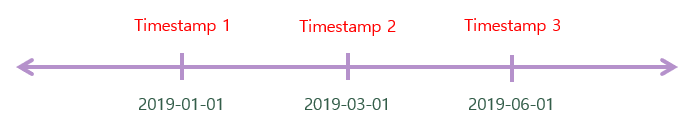
	- Period: 두 지점 사이의 일정한 기간을 나타냄 
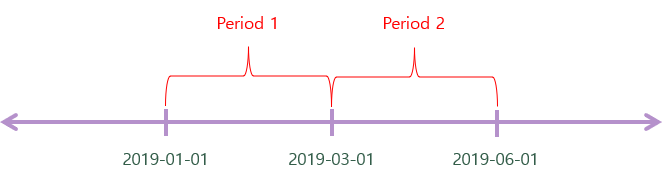

### 다른 자료형을 시계열 데이터로 변환하기

- 문자열이나 숫자로 저장된 데이터를 판다스 시계열 객체(Timestamp)로 변환
- 문자열을 Timestamp로 변환
    - to_datetime()함수
    
- 주식 시장에서 거래되는 A종목의 거래 데이터를 정리한 파일을 예제파일로 사용

In [128]:
# 라이브러리 불러오기
import pandas as pd

# read_csv() 함수로 CSV 파일을 가져와서 df로 변환
df = pd.read_csv('08stock-data.csv')

# 데이터 내용 확인
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [129]:
# 데이터 정보 확인(날짜 데이터가 문자열로 저장되어 있음)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [130]:
# 문자열로 만들어진 날짜 데이터(시리즈 객체)를 판다스 Timestamp로 변환
ts = pd.to_datetime(df['Date'])
ts

0    2018-07-02
1    2018-06-29
2    2018-06-28
3    2018-06-27
4    2018-06-26
5    2018-06-25
6    2018-06-22
7    2018-06-21
8    2018-06-20
9    2018-06-19
10   2018-06-18
11   2018-06-15
12   2018-06-14
13   2018-06-12
14   2018-06-11
15   2018-06-08
16   2018-06-07
17   2018-06-05
18   2018-06-04
19   2018-06-01
Name: Date, dtype: datetime64[ns]

In [131]:
# 앞의 시리즈를 df에 새로운 열로 추가
df['new_Date'] = pd.to_datetime(df['Date'])   
df.head()

,Date,Close,Start,High,Low,Volume,new_Date
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26


In [132]:
# 데이터프레임 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


In [133]:
# 시계열 값으로 변환된 열을 새로운 행 인덱스로 지정하고 기존 날짜 열은 삭제
df.set_index('new_Date', inplace=True)
df.drop('Date', axis=1, inplace=True)
df.head()

,Close,Start,High,Low,Volume
new_Date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2018-07-02 to 2018-06-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Close   20 non-null     int64
 1   Start   20 non-null     int64
 2   High    20 non-null     int64
 3   Low     20 non-null     int64
 4   Volume  20 non-null     int64
dtypes: int64(5)
memory usage: 960.0 bytes


In [135]:
# 데이터프레임 내용 확인
df

,Close,Start,High,Low,Volume
new_Date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039
2018-06-25,11150,11400,11450,11000,55519
2018-06-22,11300,11250,11450,10750,134805
2018-06-21,11200,11350,11750,11200,133002
2018-06-20,11550,11200,11600,10900,308596


##### 이해하기
- 시계열 값을 인덱스로 지정하면 DatetimeIndex로 저장됨
- 판다스는 시계열 인덱스 클래스를 지원하여 시간 순서에 맞춰 인덱싱이나 슬라이싱이 편리함 

### Timestamp를 Period로 변환하기
- to_period()함수
    - Timestamp를 일정한 기간을 나타내는 Period객체로 변환
    - freq옵션에 기준이 되는 기간 설정
    - 참조
    https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

In [136]:
# 라이브러리 불러오기
import pandas as pd

# 날짜 형식의 문자열로 구성되는 리스트 정의
dates = ['2019-01-01', '2020-03-01', '2021-06-01']

# 문자열 데이터(시리즈 객체)를 판다스 Timestamp로 변환
ts_dates = pd.to_datetime(dates)   
ts_dates

DatetimeIndex(['2019-01-01', '2020-03-01', '2021-06-01'], dtype='datetime64[ns]', freq=None)

#### 예제
- 3개의 날짜 데이터를 Timestamp로 변환하고 기간 옵션을 다르게 하여 Period객체를 지정하는 예시

In [137]:
# Timestamp를 Period로 변환(freq='D')
pr_day = ts_dates.to_period(freq='D')
pr_day

PeriodIndex(['2019-01-01', '2020-03-01', '2021-06-01'], dtype='period[D]')

In [138]:
# Timestamp를 Period로 변환(freq='M')
pr_month = ts_dates.to_period(freq='M')
pr_month

PeriodIndex(['2019-01', '2020-03', '2021-06'], dtype='period[M]')

In [139]:
# Timestamp를 Period로 변환(freq='A')
pr_year = ts_dates.to_period(freq='A')
pr_year

PeriodIndex(['2019', '2020', '2021'], dtype='period[A-DEC]')

### 시계열 데이터 생성하기
#### Timestamp배열
- date_range()함수
    - 여러 개의 Timestamp객체 데이터를 생성할 수 있음


- 예)  
    '2019-01-01' #시작  
    end=None     # 끝을 지정하지 않음  
    period=6     # 6개를 생성  
    freq='MS'    # M은 월 S는 시작일 
    tz='Asiz/Seoul' # 시간대 설정

In [140]:
# 라이브러리 불러오기
import pandas as pd

# Timestamp의 배열 만들기 - 월 간격, 월의 시작일 기준
ts_ms = pd.date_range(start='2019-01-01',    # 날짜 범위의 시작
                   end=None,                 # 날짜 범위의 끝
                   periods=6,                # 생성할 Timestamp의 개수
                   freq='MS',                # 시간 간격 (MS: 월의 시작일)
                   tz='Asia/Seoul')          # 시간대(timezone)
ts_ms

DatetimeIndex(['2019-01-01 00:00:00+09:00', '2019-02-01 00:00:00+09:00',
               '2019-03-01 00:00:00+09:00', '2019-04-01 00:00:00+09:00',
               '2019-05-01 00:00:00+09:00', '2019-06-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')

In [141]:
# 월 간격, 월의 마지막 날 기준
ts_me = pd.date_range('2019-01-01', periods=6, 
                   freq='M',              # 시간 간격 (M: 월의 마지막 날)
                   tz='Asia/Seoul')       # 시간대(timezone)
ts_me

DatetimeIndex(['2019-01-31 00:00:00+09:00', '2019-02-28 00:00:00+09:00',
               '2019-03-31 00:00:00+09:00', '2019-04-30 00:00:00+09:00',
               '2019-05-31 00:00:00+09:00', '2019-06-30 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='M')

In [142]:
# 분기(3개월) 간격, 월의 마지막 날 기준
ts_3m = pd.date_range('2019-01-01', periods=6, 
                   freq='3M',             # 시간 간격 (3M: 3개월)
                   tz='Asia/Seoul')       # 시간대(timezone)
ts_3m

DatetimeIndex(['2019-01-31 00:00:00+09:00', '2019-04-30 00:00:00+09:00',
               '2019-07-31 00:00:00+09:00', '2019-10-31 00:00:00+09:00',
               '2020-01-31 00:00:00+09:00', '2020-04-30 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='3M')

#### Period 배열
- period_range()함수

In [143]:
# 라이브러리 불러오기
import pandas as pd

# Period 배열 만들기 - 1개월 길이
pr_m = pd.period_range(start='2019-01-01',     # 날짜 범위의 시작
                   end=None,                   # 날짜 범위의 끝
                   periods=3,                  # 생성할 Period 개수
                   freq='M')                   # 기간의 길이 (M: 월)
pr_m

PeriodIndex(['2019-01', '2019-02', '2019-03'], dtype='period[M]')

In [144]:
# Period 배열 만들기 - 1시간 길이
pr_h = pd.period_range(start='2019-01-01',     # 날짜 범위의 시작
                   end=None,                   # 날짜 범위의 끝
                   periods=3,                  # 생성할 Period 개수
                   freq='H')                   # 기간의 길이 (H: 시간)
pr_h

PeriodIndex(['2019-01-01 00:00', '2019-01-01 01:00', '2019-01-01 02:00'], dtype='period[H]')

In [145]:
# Period 배열 만들기 - 2시간 길이
pr_2h = pd.period_range(start='2019-01-01',    # 날짜 범위의 시작
                   end=None,                   # 날짜 범위의 끝
                   periods=3,                  # 생성할 Period 개수
                   freq='2H')                  # 기간의 길이 (H: 시간)
pr_2h

PeriodIndex(['2019-01-01 00:00', '2019-01-01 02:00', '2019-01-01 04:00'], dtype='period[2H]')

## 시계열 데이터 활용

### 날짜 데이터 분리하기
= 년-월-일 날짜 데이터에서 일부를 분리하여 추출할 수 있음

In [147]:
# 라이브러리 불러오기
import pandas as pd

# read_csv() 함수로 파일 읽어와서 df로 변환
df = pd.read_csv('08stock-data.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [148]:
# 문자열인 날짜 데이터를 판다스 Timestamp로 변환하여 df에 새로운 열로 추가
df['new_Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Close,Start,High,Low,Volume,new_Date
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26


In [149]:
# dt객체 확인
df['new_Date'].dt

In [150]:
# dt객체로 날짜 값 추출하기(year, month, day)
#df['new_Date'].dt.year
#df['new_Date'].dt.month
df['new_Date'].dt.day

0      2
1     29
2     28
3     27
4     26
5     25
6     22
7     21
8     20
9     19
10    18
11    15
12    14
13    12
14    11
15     8
16     7
17     5
18     4
19     1
Name: new_Date, dtype: int64

In [151]:
# dt 속성을 이용하여 new_Date 열의 년월일 정보를 년, 월, 일로 구분
df['Year'] = df['new_Date'].dt.year
df['Month'] = df['new_Date'].dt.month
df['Day'] = df['new_Date'].dt.day
df.head()

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Day
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7,2
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6,29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6,28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6,26


In [152]:
# Timestamp를 Period로 변환하여 년월일 표기 변경하기
df['Date_yr'] = df['new_Date'].dt.to_period(freq='A')
df['Date_m'] = df['new_Date'].dt.to_period(freq='M')
df.head()

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Day,Date_yr,Date_m
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7,2,2018,2018-07
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6,29,2018,2018-06
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6,28,2018,2018-06
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27,2018,2018-06
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6,26,2018,2018-06


In [153]:
# 원하는 열을 새로운 행 인덱스로 지정
df.set_index('Date_m', inplace=True)
df.head()

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Day,Date_yr
Date_m,,,,,,,,,,,
2018-07,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7,2,2018
2018-06,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6,29,2018
2018-06,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6,28,2018
2018-06,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27,2018
2018-06,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6,26,2018


### 날짜 인덱스 활용하기
- 판다스의 시계열 데이터 형식을 인덱스로 지정하면 고유한 속성으로 변경됨
- Timestamp로 구성된 열 -> DatetimeIndex
- Period로 구성된 열 -> PeriodIndex


- DatetimeIndex, PeriodIndex를 이용하면 시계열 데이터에 대한 인덱싱과 슬라이싱이 편리

In [154]:
# 라이브러리 불러오기
import pandas as pd

# read_csv() 함수로 파일 읽어와서 df로 변환
df = pd.read_csv('08stock-data.csv')

# 문자열인 날짜 데이터를 판다스 Timestamp로 변환
df['new_Date'] = pd.to_datetime(df['Date'])   # 새로운 열에 추가
df.set_index('new_Date', inplace=True)        # 행 인덱스로 지정

df.head()

,Date,Close,Start,High,Low,Volume
new_Date,,,,,,
2018-07-02,2018-07-02,10100,10850,10900,10000,137977
2018-06-29,2018-06-29,10700,10550,10900,9990,170253
2018-06-28,2018-06-28,10400,10900,10950,10150,155769
2018-06-27,2018-06-27,10900,10800,11050,10500,133548
2018-06-26,2018-06-26,10800,10900,11000,10700,63039


In [155]:
df.index

DatetimeIndex(['2018-07-02', '2018-06-29', '2018-06-28', '2018-06-27',
               '2018-06-26', '2018-06-25', '2018-06-22', '2018-06-21',
               '2018-06-20', '2018-06-19', '2018-06-18', '2018-06-15',
               '2018-06-14', '2018-06-12', '2018-06-11', '2018-06-08',
               '2018-06-07', '2018-06-05', '2018-06-04', '2018-06-01'],
              dtype='datetime64[ns]', name='new_Date', freq=None)

- 날짜 인덱스를 이용하면 년-월-일 중에서 내가 필요한 레벨을 선택하여 인덱싱 가능
    - 년도만
    - 년-월
    - 년-월-일 등
    

- 날짜 범위를 이용한 슬라이싱 추출도 가능
    - df['2018'] 과 같은 형식은 향후 제거될 기능  => df.loc['2018']형식으로 사용

In [156]:
# 날짜 인덱스를 이용하여 데이터 선택하기
df_y = df.loc['2018']
df_y.head()

,Date,Close,Start,High,Low,Volume
new_Date,,,,,,
2018-07-02,2018-07-02,10100,10850,10900,10000,137977
2018-06-29,2018-06-29,10700,10550,10900,9990,170253
2018-06-28,2018-06-28,10400,10900,10950,10150,155769
2018-06-27,2018-06-27,10900,10800,11050,10500,133548
2018-06-26,2018-06-26,10800,10900,11000,10700,63039


In [157]:
# loc 인덱서 활용
df_ym = df.loc['2018-07']   
df_ym

,Date,Close,Start,High,Low,Volume
new_Date,,,,,,
2018-07-02,2018-07-02,10100,10850,10900,10000,137977


In [158]:
# 열 범위 슬라이싱
df_ym_cols = df.loc['2018-07', 'Start':'High']
df_ym_cols

,Start,High
new_Date,,
2018-07-02,10850,10900


In [159]:
# loc 인덱서 활용(yyyy-mm-dd)
df_ymd = df.loc['2018-07-02']
df_ymd

Date      2018-07-02
Close          10100
Start          10850
High           10900
Low            10000
Volume        137977
Name: 2018-07-02 00:00:00, dtype: object

In [160]:
# 날짜 범위 지정
df_ymd_range = df['2018-06-25':'2019-06-20']    
df_ymd_range

,Date,Close,Start,High,Low,Volume
new_Date,,,,,,
2018-07-02,2018-07-02,10100,10850,10900,10000,137977
2018-06-29,2018-06-29,10700,10550,10900,9990,170253
2018-06-28,2018-06-28,10400,10900,10950,10150,155769
2018-06-27,2018-06-27,10900,10800,11050,10500,133548
2018-06-26,2018-06-26,10800,10900,11000,10700,63039
2018-06-25,2018-06-25,11150,11400,11450,11000,55519


- 날짜 사이의 시간 간격 구하기
- 특정 날짜로부터 얼만큼 경과했는지 확인하는 예시

In [161]:
# 시간 간격 계산. 최근 180일 ~ 189일 사이의 값들만 선택하기
today = pd.to_datetime('2018-12-25')            # 기준일 생성
df['time_delta'] = today - df.index             # 날짜 차이 계산
df.head()

,Date,Close,Start,High,Low,Volume,time_delta
new_Date,,,,,,,
2018-07-02,2018-07-02,10100,10850,10900,10000,137977,176 days
2018-06-29,2018-06-29,10700,10550,10900,9990,170253,179 days
2018-06-28,2018-06-28,10400,10900,10950,10150,155769,180 days
2018-06-27,2018-06-27,10900,10800,11050,10500,133548,181 days
2018-06-26,2018-06-26,10800,10900,11000,10700,63039,182 days


In [162]:
# 슬라이싱과 인덱싱을 위해 날짜차이 행을 행 인덱스로 지정
df2 = df.set_index('time_delta')
df2.head()

,Date,Close,Start,High,Low,Volume
time_delta,,,,,,
176 days,2018-07-02,10100,10850,10900,10000,137977
179 days,2018-06-29,10700,10550,10900,9990,170253
180 days,2018-06-28,10400,10900,10950,10150,155769
181 days,2018-06-27,10900,10800,11050,10500,133548
182 days,2018-06-26,10800,10900,11000,10700,63039


In [163]:
# 슬라이싱
df_180to189 = df2['180 days':'189 days']
df_180to189

,Date,Close,Start,High,Low,Volume
time_delta,,,,,,
180 days,2018-06-28,10400,10900,10950,10150,155769
181 days,2018-06-27,10900,10800,11050,10500,133548
182 days,2018-06-26,10800,10900,11000,10700,63039
183 days,2018-06-25,11150,11400,11450,11000,55519
186 days,2018-06-22,11300,11250,11450,10750,134805
187 days,2018-06-21,11200,11350,11750,11200,133002
188 days,2018-06-20,11550,11200,11600,10900,308596
189 days,2018-06-19,11300,11850,11950,11300,180656


In [164]:
# df 데이터프레임 확인
df

,Date,Close,Start,High,Low,Volume,time_delta
new_Date,,,,,,,
2018-07-02,2018-07-02,10100,10850,10900,10000,137977,176 days
2018-06-29,2018-06-29,10700,10550,10900,9990,170253,179 days
2018-06-28,2018-06-28,10400,10900,10950,10150,155769,180 days
2018-06-27,2018-06-27,10900,10800,11050,10500,133548,181 days
2018-06-26,2018-06-26,10800,10900,11000,10700,63039,182 days
2018-06-25,2018-06-25,11150,11400,11450,11000,55519,183 days
2018-06-22,2018-06-22,11300,11250,11450,10750,134805,186 days
2018-06-21,2018-06-21,11200,11350,11750,11200,133002,187 days
2018-06-20,2018-06-20,11550,11200,11600,10900,308596,188 days


In [165]:
# df2 데이터프레임 확인
df2

,Date,Close,Start,High,Low,Volume
time_delta,,,,,,
176 days,2018-07-02,10100,10850,10900,10000,137977
179 days,2018-06-29,10700,10550,10900,9990,170253
180 days,2018-06-28,10400,10900,10950,10150,155769
181 days,2018-06-27,10900,10800,11050,10500,133548
182 days,2018-06-26,10800,10900,11000,10700,63039
183 days,2018-06-25,11150,11400,11450,11000,55519
186 days,2018-06-22,11300,11250,11450,10750,134805
187 days,2018-06-21,11200,11350,11750,11200,133002
188 days,2018-06-20,11550,11200,11600,10900,308596
